# Stock-Prediction

### Import Libraries 

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
plt.style.use('fivethirtyeight')

In [2]:
# Setting up the date range
start_date = '2011-01-01'
end_date = '2023-09-01'

In [3]:
# Downloading historical stock data from Yahoo Finance
df = yf.download('AAPL', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


#### Explore the data 

In [4]:
print("Sample Data:")
print(df.head())

Sample Data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2011-01-03  11.630000  11.795000  11.601429  11.770357   9.990638  445138400
2011-01-04  11.872857  11.875000  11.719643  11.831786  10.042776  309080800
2011-01-05  11.769643  11.940714  11.767857  11.928571  10.124929  255519600
2011-01-06  11.954286  11.973214  11.889286  11.918929  10.116747  300428800
2011-01-07  11.928214  12.012500  11.853571  12.004286  10.189198  311931200


In [5]:
print("Data Shape:", df.shape)

Data Shape: (3187, 6)


#### Visualization of closing price history

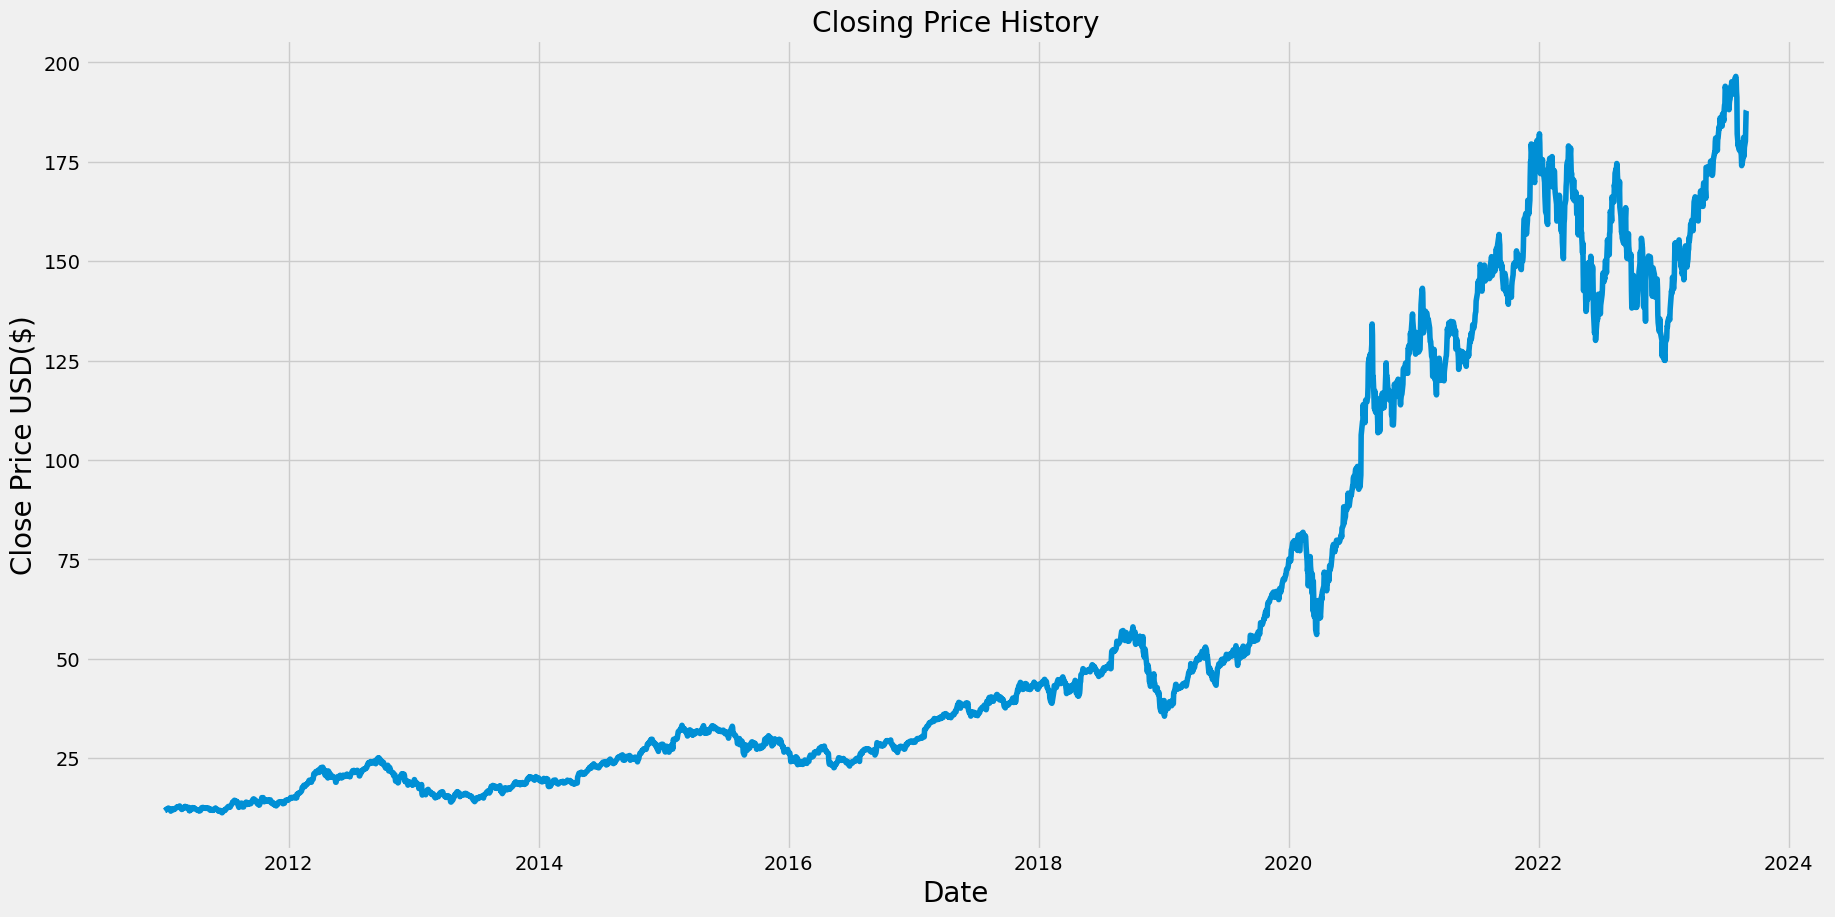

In [6]:
plt.figure(figsize=(20, 10))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD($)', fontsize=20)
plt.show()

####  Data preprocessing

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
print("Training Data Length:", training_data_len)

Training Data Length: 2550


In [8]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
# Splitting the data into training sets (x_train, y_train)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))

### Building the LSTM model 

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#### Preparing test data for prediction

In [11]:
test_data = scaled_data[training_data_len-60:, :1]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


#### Predictions

In [12]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


20/20 [==============================] - 1s 15ms/step


#### Calculating RMSE for evaluation 

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 150.7992062281266


#### Calculating MAE (Mean Absolute Error) 

In [14]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 149.55254336204408


#### Calculating R-squared (R2) score 

In [15]:
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -67.84646556109843


#### Visualize the predictions and actual prices 

In [16]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\pruth\AppData\Local\Temp\ipykernel_4756\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [17]:
valid

,Close,Predictions
Date,,
2021-02-22,126.000000,5.533327
2021-02-23,125.860001,5.600827
2021-02-24,125.349998,5.673952
2021-02-25,120.989998,5.749127
2021-02-26,121.260002,5.839505
...,...,...
2023-08-25,178.610001,2.625971
2023-08-28,180.190002,2.621591
2023-08-29,184.119995,2.602181


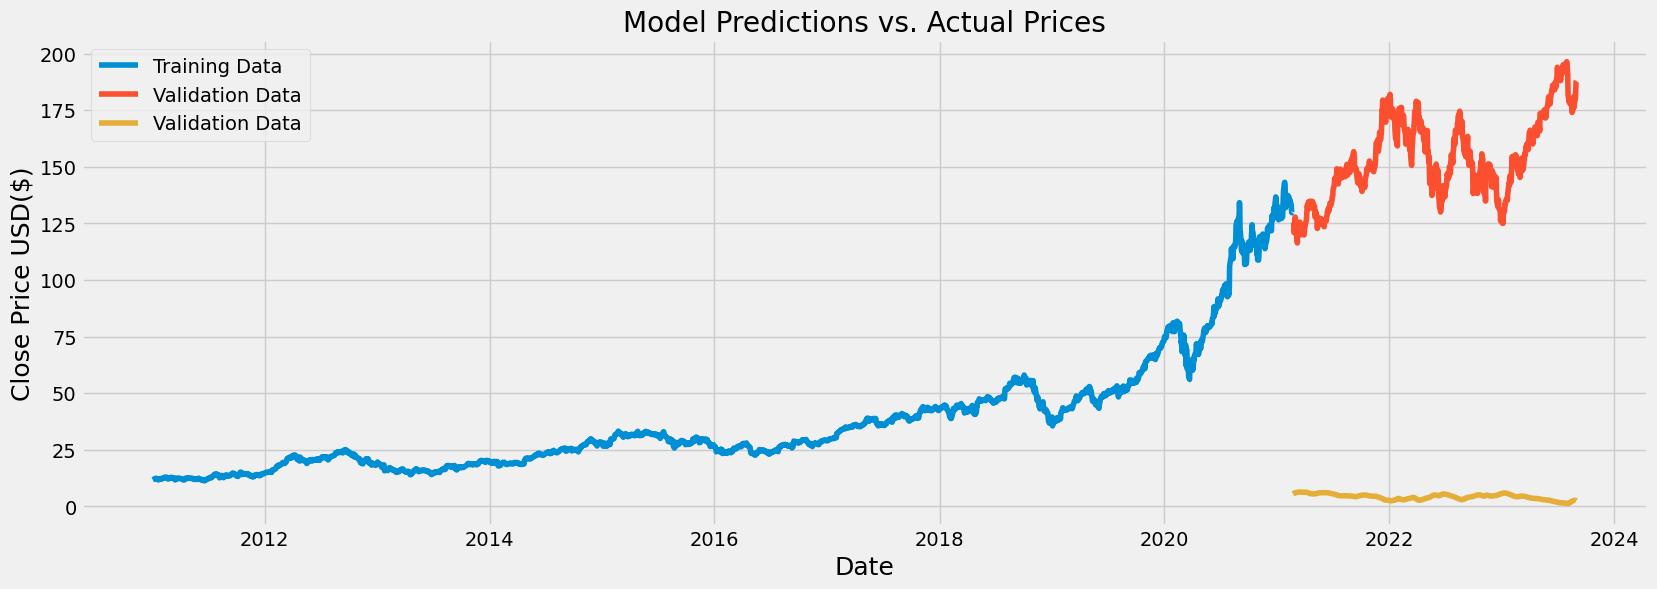

In [18]:
plt.figure(figsize=(18, 6))
plt.title('Model Predictions vs. Actual Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']], label='Validation Data')
plt.legend(loc='upper left')
plt.show()

In [19]:
apple_quote2 = yf.download('AAPL', start='2023-04-05', end='2023-04-10')
new_df = apple_quote2.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
x_test = []
# Append the last 60 days
x_test.append(last_60_days_scaled)
# Convert x_test to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(x_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 1s 926ms/step


In [20]:
print("Predicted Stock Price:",pred_price)

Predicted Stock Price: [[10.266155]]


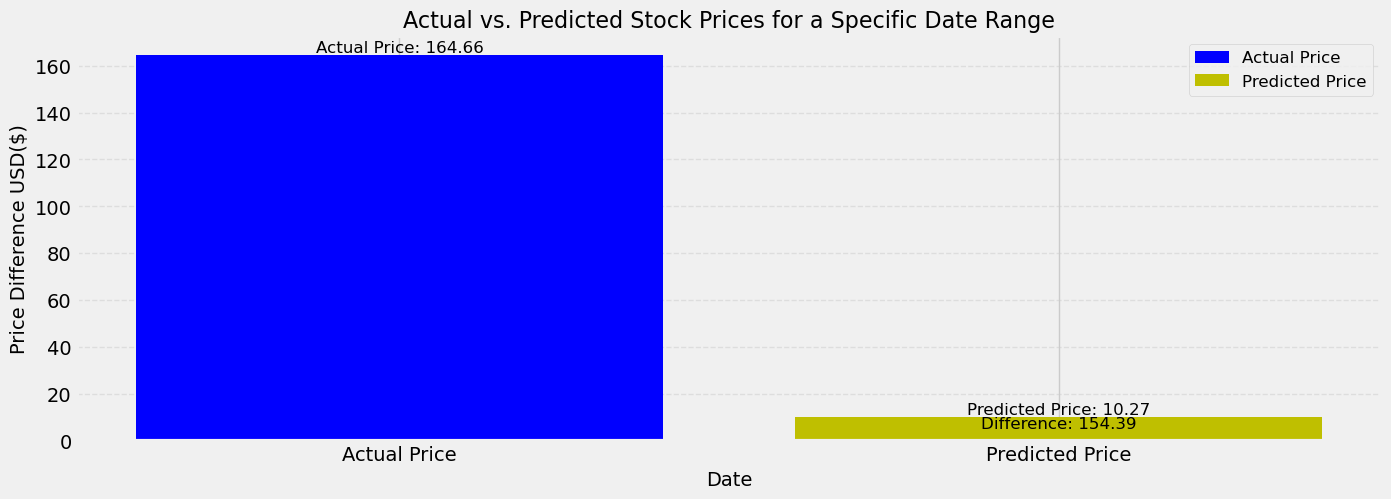

In [22]:
predicted_df = pd.DataFrame({'Date': [pd.to_datetime('2023-04-10')], 'Predicted Price': [pred_price[0][0]]})
difference = apple_quote2['Close'].iloc[-1] - predicted_df['Predicted Price'].iloc[0]

plt.figure(figsize=(15, 5))
plt.title('Actual vs. Predicted Stock Prices for a Specific Date Range', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price Difference USD($)', fontsize=14)
plt.bar('Actual Price', apple_quote2['Close'].iloc[-1], color='b', label='Actual Price')
plt.bar('Predicted Price', predicted_df['Predicted Price'].iloc[0], color='y', label='Predicted Price')
plt.text('Actual Price', apple_quote2['Close'].iloc[-1] + 1, f'Actual Price: {apple_quote2["Close"].iloc[-1]:.2f}', ha='center', fontsize=12, color='black')
plt.text('Predicted Price', predicted_df['Predicted Price'].iloc[0] + 1, f'Predicted Price: {predicted_df["Predicted Price"].iloc[0]:.2f}', ha='center', fontsize=12, color='black')
plt.text('Predicted Price', predicted_df['Predicted Price'].iloc[0] - 5, f'Difference: {difference:.2f}', ha='center', fontsize=12, color='black')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()